<a href="https://github.com/AI-FREE-Team/Machine-Learning-Basic/blob/main/Materials/%E7%B5%B1%E8%A8%88%E6%A6%82%E5%BF%B5_%E7%9B%B8%E9%97%9C%E4%BF%82%E6%95%B8_%E5%85%B1%E7%B7%9A%E6%80%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>


# 前言

本篇文章以 <font color="#00dd00">**Python**</font> 3.7.10、<font color="#00dd00">**Numpy**</font> 1.19.5、<font color="#00dd00">**Pandas**</font> 1.1.5、<font color="#00dd00">**Matplotlib**</font> 3.2.2、<font color="#00dd00">**Seaborn**</font> 0.11.1、<font color="#00dd00">**SciPy**</font> 1.4.1 進行教學。本篇文章將介紹相關係數的定義、如何透過視覺化來觀察資料的相關性、共線性的偵測方式，來觀察資料的樣貌。

## 匯入基本套件

In [ ]:
!python --version

Python 3.7.11


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns
import scipy as sp

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )
print( 'SciPy 版本: ', sp.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1
SciPy 版本:  1.4.1


## 匯入資料集

* 鐵達尼號

首先，透過程式碼將資料集檔案 (excel) 從 GitHub 下載

In [ ]:
!git clone https://github.com/AI-FREE-Team/Machine-Learning-Basic.git

Cloning into 'Machine-Learning-Basic'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (354/354), done.
remote: Total 457 (delta 225), reused 261 (delta 96), pack-reused 0
Receiving objects: 100% (457/457), 31.26 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Machine-Learning-Basic

In [ ]:
#鐵達尼號 from kaggle
titanic_train = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/train.csv' )
titanic_test = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/test.csv' )
titanic_submit = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/gender_submission.csv' )

In [ ]:
# 合併 train 及 test 的資料 
titanic_data = titanic_train.append( titanic_test, sort=False )
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 隨機資料

In [ ]:
d1 = pd.Series(2*np.random.normal(size=100)+3)
d2 = np.random.f(2, 4, size=100)
d3 = np.random.randint(1, 100, size=100)

# 相關係數(Correlations)

* 當有兩組數據時，我們關係這兩組數據是否相關，相關程度有多少，可用協方差 (COV) 和相關係數 (CORRCOEF) 來衡量相關程度：

### 協方差矩陣 (cov)

* 協方差是量化一對變量之間的關係的強度和方向的量度，其絕對值越大表示相關程度越大，計算公式：<br>
  $cov(X,Y) = \frac{ \sum_{i=1}^n (X_i-\hat{X})(Y_i-\hat{Y}) }{n-1}$
  * 正值表示正相關：更強的關係對應於更高的協方差值
  * 負值表示負相關：更強的關係對應於協方差的較低 (或較高的絕對值) 值
  * 0 表示不相關，

* 自訂函數

In [ ]:
n1 = len(d1)
n2 = len(d2)
mean_d1, mean_d2 = sum(d1)/n1, sum(d2)/n2
cov_d12 = (sum((d1[k]-mean_d1) * (d2[k] - mean_d2) for k in range(n1)) / (n1 - 1))
cov_d12

2.3006339464030034

* `np.cov()`

In [ ]:
np.cov(d1, d2)

array([[ 4.81830422,  2.30063395],
       [ 2.30063395, 96.40438178]])

### 連續變數的相關係數 (corr)

* 本篇文章將介紹三個相關係數：
  * Pearson 係數：
    * 說明：考慮具有兩個特徵的數據集 X 和 Y 。每個特徵有 n 個值，所以 X 和 Y 是 n 元組。假設 X 的第一個值 x₁ 對應於 Y 的第一個值 y₁，X 的第二個值 x₂ 對應於 Y 的第二個值 y₂ ，依此類推。那麼，有 n 對對應的值：(x₁, y₁), (x₂, y₂)，依此類推。這些 xy 對中的每一個都代表一個觀察結果。皮爾遜(積矩) 的相關係數是兩個特徵之間的線性關係的度量，稱為 Pearson's r。
    * 公式：
$\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X \sigma_Y}$
      * $cov$ 是協方差
      * $\sigma_X$ 是 X 的標準差
      * $\sigma_Y$ 是 Y 的標準差
    * r 的絕對值越大表示相關性越強，更接近線性函數。r 的絕對值越小表示相關性越弱。
    * 詳細請詳閱[Pearson 係數](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

| Pearson's r | x和y之間的相關性 |
|---------------|:---------------:|
| 等於 1 | 完美的正線性關係 |
| 大於 0 | 正相關性 |
| 等於 0 | 沒有線性關係 |
| 小於 0 | 負相關性 |
| 等於 -1 | 完美的負線性關係 |

  * Spearman 係數 ($\rho$)：
    * 說明：兩個特徵之間的Spearman 相關係數是它們的秩值之間的 Pearson 相關係數。它的計算方式與 Pearson 相關係數相同，但考慮的是它們的等級而不是它們的值。它通常用希臘字母 rho ($\rho$) 表示，稱為 Spearman 的 rho。假設有兩個 n 元組 x 和 y，其中($x_1$, $y_1$)、($x_2$, $y_2$)、…觀察值作為對應值對。可按照與 Pearson 係數相同的方式計算 Spearman 相關係數 $\rho$。將使用排名而不是來自 x 和 y 的實際值。
    * 公式：
$r_s = \rho_{rg_X} \rho_{rg_Y} = \frac{cov(rg_X, rg_Y)}{\sigma_{rg_X} \sigma_{rg_Y}}$
      * $cov(rg_X, rg_Y)$：變量的協方差
      * $\sigma_{rg_X}$、$\sigma_{rg_Y}$：變量的標準差
    * 詳細請詳閱[Spearman 係數](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
    * 特性：
      * 它可以採用 $-1 \leq \rho 	\leq 1$ 範圍內的實數值。
      * 其最大值 $\rho = 1$ 對應於 x 和 y 之間存在單調遞增函數的情況。換句話說，較大的 x 值對應於較大的 y 值，反之亦然。
      * 其最小值 $\rho = -1$ 對應於 x 和 y 之間存在單調遞減函數的情況。換句話說，較大的 x 值對應於較小的 y 值，反之亦然。

  * Kendall rank 係數 ($\tau$)：
    * 說明：考慮兩個 n 元組 x 和 y。每個 xy 對($x_1$, $y_1$), ($x_2$, $y_2$), …都是一個觀察值。一對觀測值 ($x_i$, $y_i$) 和 ($x_j$, $y_j$)，其中 i < j。Kendall 相關係數比較一致和不一致的對數據的數。該係數基於一致對和不一致對的計數相對於 xy 對數的差異。它通常用希臘字母 tau (\tau) 表示，稱為Kendall's tau。
    * 公式：
$\tau=\frac{(number of concordant pairs)-(number of discordant pairs)}{C_2^n}$
    * 詳細請詳閱[文件](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
    * 特性： 
      * 一致如果 ( $x_i > x_j$ 和 $y_i > y_j$) 或 ( $x_i < x_j$ 和 $y_i < y_j$ )，其最大值 $\tau=1$ 表示所有對都是一致的。
      * 不和諧如果 ( $x_i < x_j$ 和 $y_i > y_j$) 或 ( $x_i > x_j$ 和 $y_i < y_j$ )，其最小值 $\tau=-1$ 表示所有對都是不一致的。
      * 既不如果有在領帶 X($x_i=x_j$) 或在領帶 Ŷ($y_i=y_j$)

* 比較：
  * Pearson 係數衡量線性相關性
  * Spearman 和 Kendall 係數比較數據的等級

* 以鐵達尼號為例

#### 線性相關性

![py-corr-1](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/py-corr-1.webp)

* 上圖的每一個顯示三種不同形式的相關性：
  * 負相關 (紅點)：在左邊的圖中，y 值往往隨著 x 值的增加而減少。這顯示出很強的負相關，當一個特徵的大值對應另一個特徵的小值時就會發生這種情況，反之亦然。
  * 弱相關或無相關 (綠點)：中間的圖沒有顯示出明顯的趨勢。這是弱相關的一種形式，當兩個特徵之間的關聯不明顯或幾乎不可觀察時就會發生這種情況。
  * 正相關 (藍點)：在右圖中，y 值往往隨著 x 值的增加而增加。這說明了強正相關，當一個特徵的大值對應另一個特徵的大值時就會發生這種情況，反之亦然。

In [ ]:
corr_matrix = titanic_data.corr()           # Pearson's r
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


* 此範例顯示兩種訪問值的方法：
  * 用於 `.at[]` 按行和列標籤訪問單個值
  * 用於 `.iat[]` 按行和列的位置訪問值

In [ ]:
print( corr_matrix.at['Pclass', 'Survived'] )
print( corr_matrix.iat[2, 1] )
print('='*20)
print('是否相等: ', corr_matrix.at['Pclass', 'Survived']==corr_matrix.iat[2, 1])

-0.33848103596101586
-0.33848103596101586
是否相等:  True


In [ ]:
pd.DataFrame({'Pclass': titanic_data['Pclass'], 'Age': titanic_data['Age']})

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
413,3,NaN
414,1,39.0
415,3,38.5
416,3,NaN


* 下面範例介紹 `.corrwith()`，它允許計算一個 DataFrame 對象的行或列與作為第一個參數傳遞的另一個 Series 或 DataFrame 對象之間的相關係數，結果是一個新的 Series 與該列的相關係數對象 xy['Pclass'] 和的值 z，以及對於係數 xy['Age'] 和 z：

#### 等級相關

* 秩相關比較與兩個變量或數據集特徵相關的數據的秩或排序。如果排序相似，則相​​關性強、正且高。但是，如果排序接近顛倒，則相關性強、為負且低。換句話說，秩相關只與值的順序有關，而不與數據集中的特定值有關。

![py-corr-2](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/py-corr-2.webp)

* 左圖在 x 和 y 之間具有完美的正線性關係，因此 r=1。中央圖顯示正相關，右圖顯示負相關。但是，它們都不是線性函數，因此 r 不同於 -1 或 1。
* 當你只看排序或排名時，這三種關係都是完美的！左邊和中間的圖顯示了觀察值，其中較大的 x 值總是對應於較大的 y 值。這是完美的正秩相關。右圖說明了相反的情況，即完美的負秩相關。

In [ ]:
titanic_data.corr(method='spearman')  # Spearman's rho

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.039921,0.026822,-0.032295,-0.006191,-0.003583
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.039921,-0.339668,1.000000,-0.395892,-0.066679,-0.028752,-0.709019
Age,0.026822,-0.052565,-0.395892,1.000000,-0.129929,-0.216097,0.192676
SibSp,-0.032295,0.088879,-0.066679,-0.129929,1.000000,0.438373,0.445566
Parch,-0.006191,0.138266,-0.028752,-0.216097,0.438373,1.000000,0.400301
Fare,-0.003583,0.323736,-0.709019,0.192676,0.445566,0.400301,1.000000


In [ ]:
titanic_data.corr(method='kendall')  # Kendall's tau

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.031129,0.017609,-0.025370,-0.005095,-0.002467
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.031129,-0.323533,1.000000,-0.312672,-0.061628,-0.026480,-0.591579
Age,0.017609,-0.043385,-0.312672,1.000000,-0.100050,-0.171702,0.131694
SibSp,-0.025370,0.085915,-0.061628,-0.100050,1.000000,0.415068,0.356791
Parch,-0.005095,0.133933,-0.026480,-0.171702,0.415068,1.000000,0.322767
Fare,-0.002467,0.266229,-0.591579,0.131694,0.356791,0.322767,1.000000


#### 視覺化：Pairplot

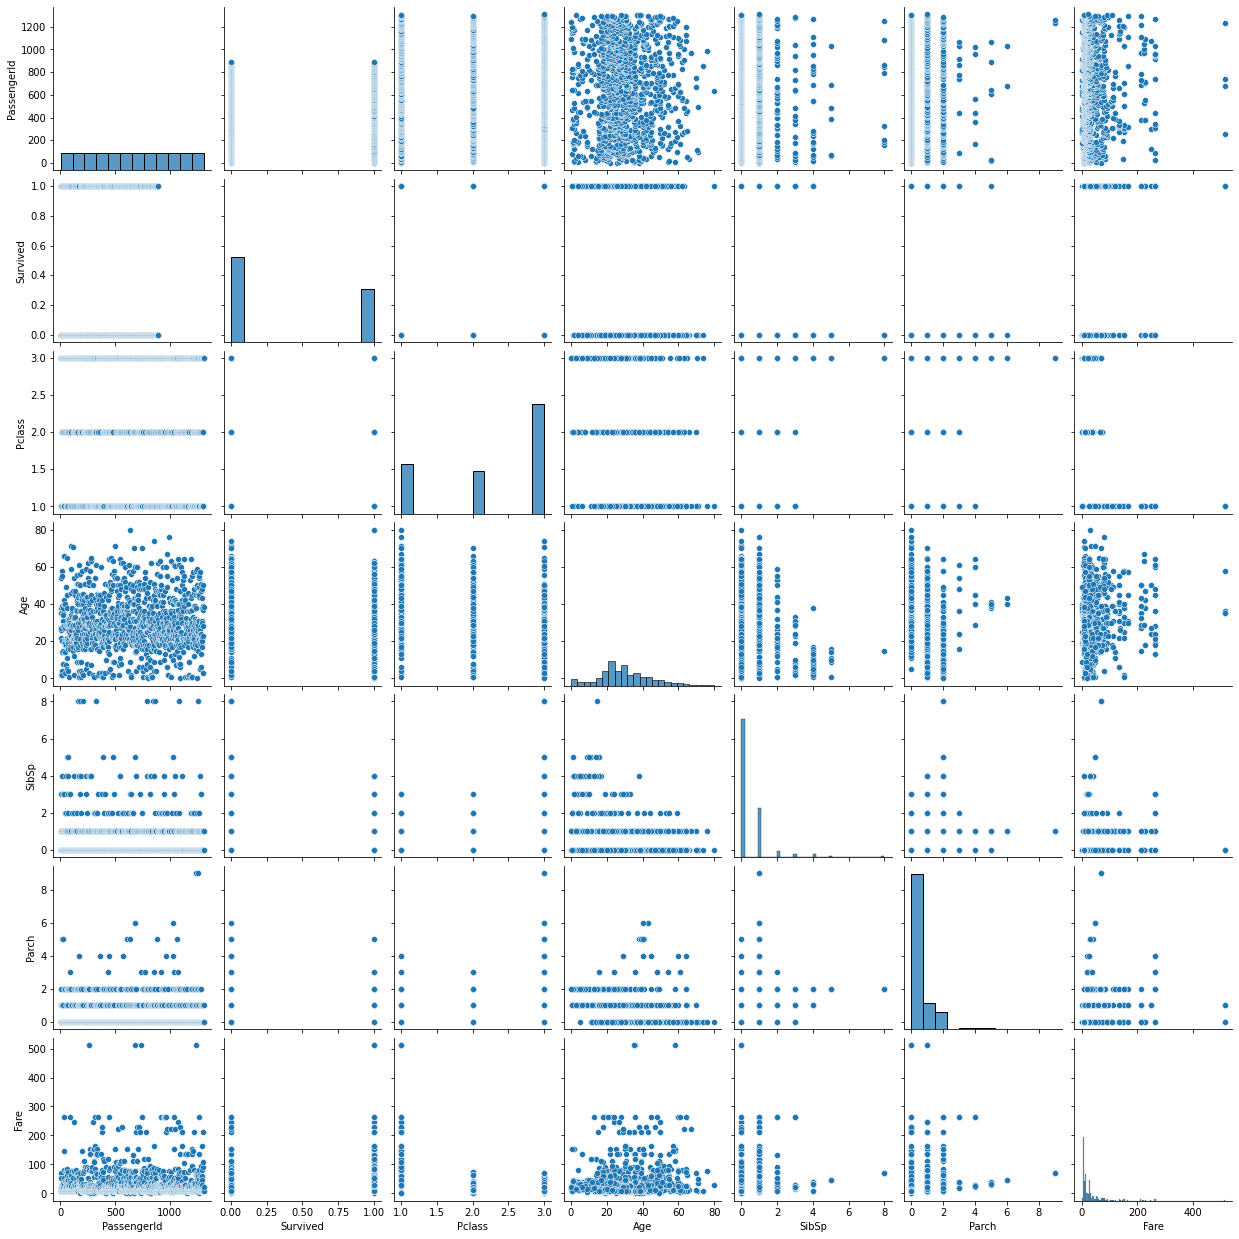

In [ ]:
sns.pairplot( titanic_data )
plt.show()

#### 視覺化：Heatmap

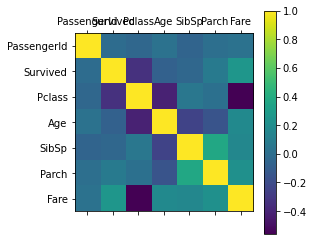

In [ ]:
colname = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.matshow(titanic_data.corr())
plt.xticks(range(len(colname)), colname)
plt.yticks(range(len(colname)), colname)
plt.colorbar()
plt.show()

# 共線性(Collinarity)

## 什麼是多重共線性？

* 當兩個或多個自變量在回歸模型中彼此高度相關時，就會出現多重共線性。
* 舉個日常生活實例來解釋：Colin 喜歡一邊吃薯片一邊看電視，他看的電視越多，吃的薯片就越多，他就越快樂！<br>
  現在，如果可以量化快樂並衡量科林在忙於做他最喜歡的活動時的快樂，你認為哪個會對他的快樂產生更大的影響？吃薯片還是看電視？這很難確定，因為當試圖通過吃薯條來衡量 Colin 的幸福程度時，他就開始看電視了。當我們試圖通過看電視來衡量他的幸福程度時，他就開始吃薯條了。<br>
  就 Colin 而言，吃薯片和看電視是高度相關的，無法單獨確定個人活動對他的幸福感的影響。這就是多重共線性問題！
* 假設變量<br>
  $x_1, x_2, ..., x_n$<br>
之間存在著<br>
  $k_1 x_1+k_2 x_2+...+k_n x_n + b = 0$<br>
的關係，那麼則說明<br>
  $x_1, x_2, ..., x_n$<br>
存在著嚴格意義上的共線姓。然而實際上，精準的共線性是很少發生的，一般而言，只要變量間近似地滿足多重共線性的公式，那麼就可以說變量間有近似的共線性。

## 具有多重共線性的問題

* 多重共線性可能是模型中的一個問題，以迴歸模型為例，因無法區分自變量對因變量的個體影響，如，假設線性方程中：<br>
  $ Y = W_0+W_1*X_1+W_2*X_2 $<br>
  其中：係數 W1 是在保持 X2 不變的情況下 X1 增加一個單位時 Y 的增加，但由於 X1 和 X2 高度相關，X1 的變化也會導致 X2 的變化，將無法看到它們對 Y 的單獨影響，這使得 X1 對 Y 的影響難以與 X2 對 Y 的影響區分開來。
* 影響：
  * 線性模型的參數對模型中的微小變化非常敏感
  * 多重共線性降低了參數估計的精準度，這會影響迴歸模型的統計功效，導致無法透過 p 值識別具有統計意義的獨立變量

## 什麼導致多重共線性？

* 可能出現多重共線性的原因
  * 數據集存在實驗設計不當、觀測數據過多或無法操縱數據
    * 從家庭收入和電器數量來確定一個家庭的用電量。在我們知道一個家庭的電器數量會隨著家庭收入的增加而增加。但是，這不能從數據集中刪除
  * 當創建依賴於其他變量的新變量時，也可能發生多重共線性
    * 根據身高和體重變量創建 BMI 變量將在模型中包含冗餘信息
  * 在數據集中包含相同的變量：
    * 包括華氏溫度和攝氏溫度的變量
  * Dummy Variable 不精確使用也會導致多重共線性問題，這稱為虛擬變量陷阱
    * 在包含具有兩個唯一值的婚姻狀態變量的數據集中：“已婚”、“單身”。為它們創建虛擬變量將包含冗餘信息。對於“已婚”/“單身”狀態，我們只能使用一個包含 0/1 的變量。
  * 某些情況下數據不足也會導致多重共線性問題

## 使用 VIF 檢測多重共線性

* 多重共線性可以通過多種方法檢測。本篇文章將介紹最常見的一種 — VIF（可變通脹因素）。
* VIF 決定自變量之間相關性的強度，它是通過取一個變量並將其與其他所有變量進行回歸來預測，也就是說自變量的 VIF 分數表示該變量被其他自變量解釋的程度。
  * 公式：$VIF = \frac{1}{1-R^2}$， $R^2$ 的值介於 0 和 1 之間
  * 說明：$R^2為找出其他自變數對自變量的描述程度，其值越接近1，VIF值越高，表示特定自變量的多重共線性越高
  * 特性：
    * VIF 從1開始，沒有上限
    * VIF=1，自變量與其他變量無相關性
    * VIF 超過 5 或 10 表示該自變量與其他變量之間存在高度多重共線性
  * 語法：`statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)`
  * 參數：
    * exog：包含執行線性回歸的特徵的數組。
    * exog_idx：要測量對其他特徵的影響的附加特徵的索引。


In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.DataFrame(np.array([d1,d2,d3]).T, columns=['x1','x2','x3'])
X = df.iloc[:,:]
calc_vif(X)

,variables,VIF
0,x1,1.771727
1,x2,1.113521
2,x3,1.824003


雖然相關矩陣和散點圖也可用於發現多重共線性，但他們的發現僅顯示自變量之間的雙變量關係。VIF 是首選，因為它可以顯示一個變量與一組其他變量的相關性。

## 修復多重共線性

* 刪除較高 VIF 值的特徵之一將有助於降低相關特徵之間的多重共線性：

In [ ]:
X = df.drop(['x3'],axis=1)
calc_vif(X)

,variables,VIF
0,x1,1.074161
1,x2,1.074161


* 刪除變量應該是一個迭代過程，從具有最大 VIF 值的變量開始，因為它的趨勢被其他變量高度捕獲。如果這樣做，您會注意到其他變量的 VIF 值也會降低，但程度不同。
* 修復多重共線性
  * 方法：將相關變量合併為一個並刪除其他變量，這將減少多重共線性。
  * 原因：
    * 當您更關心每個單獨的特徵而不是一組特徵對目標變量的影響程度時，那麼去除多重共線性可能是一個不錯的選擇。
    * 如果您感興趣的特徵中不存在多重共線性，則多重共線性可能不是問題。

* 解決多種相關性的方法一般有三種：
  * 向後消除法 (Backward elimination)：每次循環，遍歷當前還沒有剔除的變量，依次計算對應的VIF，再去除最差的那個變量 (也就是 VIF 值最大的變量)，一直循環，直至變量數目少於預期個數或者所有的變量 VIF 值都小於 VIF 閥值。一般而言 VIF > 10，認為存在共線性。
  * PCA 降維：PCA 降維後，所有提取的主成分間倆倆獨立，所以不會再有共線性。
  * 鄰迴歸分析法：鄰迴歸線性迴歸在線性迴歸的基礎上新增了一個懲罰項，解决了共線性問題。

# 結語 

本篇文章介紹相關係數的定義、如何透過視覺化來觀察資料的相關性、共線性的偵測方式，讀者可透過本篇文章的介紹更進一步瞭解如何觀察資料的樣貌。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)
* [What is Multicollinearity? Here’s Everything You Need to Know](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)
* [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic#%E8%AA%B2%E7%A8%8B%E5%A4%A7%E7%B6%B1-course-outline)